In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python3)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/dago/anaconda3/envs/tp2/bin/python3 (found version "3.6.5") 
-- Found PythonLibs: /home/dago/anaconda3/envs/tp2/lib/libpython3.6m.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/dago/Desktop/Facultad/MN/MNtp2/metnum-tp2-1C2021/tp2

In [2]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum
%load_ext autoreload
%autoreload 2
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
import os
import sys
import numpy as np
import pandas as pd

/home/dago/Desktop/Facultad/MN/MNtp2/metnum-tp2-1C2021/tp2-alu/tp2/notebooks
Python 3.6.5 :: Anaconda, Inc.


# Instancias de train and test


In [3]:
%%time

filename = "../data/train.csv"

def get_data_set(filepath, total_instances):
    df_train = pd.read_csv(filepath)
    df_train = df_train[:total_instances]
    
    # Uso values para mandar todo a arrays de numpy
    X = df_train[df_train.columns[1:]].values
    y = df_train["label"].values.reshape(-1, 1)
    
    return X, y

def main(filename, k, alpha, method, total_instances = 32000, num_iter = 1000, train_percentage = 0.8, epsilon = 1e-6 ):
    X, y = get_data_set(filename, total_instances)
    
    # take some instances for train and other for validation
    limit = int(train_percentage * X.shape[0]) 

    X_train, label_train = X[:limit], y[:limit]
    X_val, label_val = X[limit:], y[limit:]

    assert len(X_train) == len(label_train)
    assert len(X_val) == len(label_val)

    clf = metnum.KNNClassifier(k)
    
    if (method == "KNN"):
        clf.fit(X_train, label_train)
        
    if (method == "KNN_PCA"):
        pca = metnum.PCA(alpha, num_iter, epsilon)
        pca.fit(X_train)

        X_train = pca.transform(X_train)
        X_val = pca.transform(X_val)
        
        clf.fit(X_train, label_train) 

    from sklearn.metrics import accuracy_score
    label_pred = clf.predict(X_val)

    acc = accuracy_score(label_val, label_pred)
    print("Accuracy: {}".format(acc))
    return acc

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


In [5]:
%%time
main(filename, 1, 15, "KNN_PCA", 5000, 1000, 0.8, 1e-8)


Accuracy: 0.923
CPU times: user 7.42 s, sys: 447 ms, total: 7.86 s
Wall time: 7.66 s


# Testing -------------------------------------------


In [10]:
# test 1
import numpy as np
A = np.array([[ 62,   4, -52],
 [  4,   4,  -4],
 [-52,  -4,  44]])

w, V = metnum.get_first_eigenvalues(A, 3, 5000, 1e-8)

for i in range(len(A)):
    print(np.allclose(A @ V[:, i], w[i] * V[:,i]))
    print(A @ V[:, i])
    print(w[i] * V[:,i])

True
[-81.01699942  -5.84815982  68.23429144]
[-81.01699942  -5.84815982  68.23429144]
True
[-0.485262    3.71464028 -0.25779796]
[-0.485262    3.71464028 -0.25779796]
True
[0.10161836 0.02177798 0.12252162]
[0.10161836 0.02177798 0.12252162]


In [18]:
def get_x_by_label(data, labels, label ):
    result_x = []
    result_y = []
    for i in range(0,len(data)):
        if (labels[i] == label):
            result_x.append(data[i][0])
            result_y.append(data[i][1])
    return result_x, result_y

In [84]:
# Test 2 PCA
filename = "../data/train.csv"
alpha = 2
k = 1
total_instances = 100
train_percentage = 0.95
num_iter = 1000
epsilon = 1e-10

X, y = get_data_set(filename, total_instances)

# take some instances for train and other for validation
limit = int(train_percentage * X.shape[0]) 

X_train, label_train = X[:limit], y[:limit]
X_val, label_val = X[limit:], y[limit:]

assert len(X_train) == len(label_train)
assert len(X_val) == len(label_val)

clf = metnum.KNNClassifier(k)

pca = metnum.PCA(alpha, num_iter, epsilon)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_val = pca.transform(X_val)

clf.fit(X_train, label_train) 

from sklearn.metrics import accuracy_score
label_pred = clf.predict(X_val)

acc = accuracy_score(label_val, label_pred)
print("Accuracy: {}".format(acc))




Accuracy: 0.6


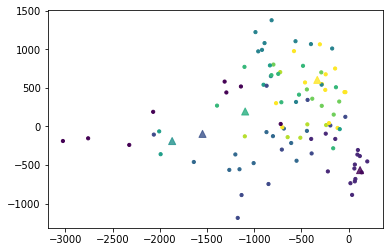

In [90]:
plt.scatter(X_train[:,0], X_train[:,1],s=10 ,c = label_train, alpha = 1)
plt.scatter(X_val[:,0], X_val[:,1], c = label_pred, s = 50, marker='^', alpha = 0.8)

plt.show()


# Implementación
- En el metodo de la potencia verificamos al final que se trate de un autovector de X con precision epsilon
- 

# Metodo para parar el metodo de la potencia
- research
- - http://www.cse.psu.edu/~b58/cse456/lecture11.pdf
- - || wk - wk+1 || inf < e
- - https://www-users.cs.umn.edu/~saad/eig_book_2ndEd.pdf
- - pag 59(69) seccion 3.2: r = Au~ - lambda~u~, r es el vector residual

- - talvez se puede usar lambda -> descartado porque habia que computar el autovalor adentro del ciclo en cada iteracion, lo cual es cosotoso.
- elegir 2/3 metodos y evaluar su eficiencia en base a la perfomance de tiempo y a distancia de los resultados obtenidos

In [5]:
%%time
# Sin método de terminación
for iterations in tqdm([1000, 2000, 3000]):
    time_init = time.perf_counter()
    main(filename, 1, 15, "KNN_PCA", 5000, iterations, 0.8, 1e-8)
    time_end = time.perf_counter()
    print("Iteration: ", iterations, " time: ", f"{time_end- time_init:0.4f}")

# Accuracy: 0.923
# Iteration:  1000  time:  8.2160
        
# Accuracy: 0.923
# Iteration:  2000  time:  10.8136
        
# Accuracy: 0.923
# Iteration:  3000  time:  12.2737

 33%|███▎      | 1/3 [00:08<00:16,  8.22s/it]

Accuracy: 0.923
Iteration:  1000  time:  8.2160


 67%|██████▋   | 2/3 [00:19<00:09,  9.74s/it]

Accuracy: 0.923
Iteration:  2000  time:  10.8136


100%|██████████| 3/3 [00:31<00:00, 10.44s/it]

Accuracy: 0.923
Iteration:  3000  time:  12.2737
CPU times: user 30.7 s, sys: 762 ms, total: 31.4 s
Wall time: 31.3 s


In [4]:
# || wk - wk+1 || inf < e
for iterations in tqdm([1000, 2000, 3000]):
    time_init = time.perf_counter()
    main(filename, 1, 15, "KNN_PCA", 5000, iterations, 0.8, 1e-8)
    time_end = time.perf_counter()
    print("Iteration: ", iterations, " time: ", f"{time_end- time_init:0.4f}")
    
# considerar que b es random por eso los resultados
# Accuracy: 0.923
# Iteration:  1000  time:  4.7722
        
# Accuracy: 0.923
# Iteration:  2000  time:  4.5494
        
# Accuracy: 0.923
# Iteration:  3000  time:  4.5293

 33%|███▎      | 1/3 [00:05<00:10,  5.42s/it]

Accuracy: 0.923
Iteration:  1000  time:  5.4148


 67%|██████▋   | 2/3 [00:10<00:05,  5.05s/it]

Accuracy: 0.923
Iteration:  2000  time:  4.7880


100%|██████████| 3/3 [00:14<00:00,  4.98s/it]

Accuracy: 0.923
Iteration:  3000  time:  4.7343


In [5]:
# pag 59(69) seccion 3.2: r = Au~ - lambda~u~, r es el vector residual
for iterations in tqdm([1000, 2000, 3000]):
    time_init = time.perf_counter()
    main(filename, 1, 15, "KNN_PCA", 5000, iterations, 0.8, 1e-8)
    time_end = time.perf_counter()
    print("Iteration: ", iterations, " time: ", f"{time_end- time_init:0.4f}")
    
# Accuracy: 0.923
# Iteration:  1000  time:  6.3910
        
# Accuracy: 0.923
# Iteration:  2000  time:  6.1160
        
# Accuracy: 0.923
# Iteration:  3000  time:  6.4459  

 33%|███▎      | 1/3 [00:06<00:13,  6.97s/it]

Accuracy: 0.923
Iteration:  1000  time:  6.9683


 67%|██████▋   | 2/3 [00:13<00:06,  6.60s/it]

Accuracy: 0.923
Iteration:  2000  time:  6.3405


100%|██████████| 3/3 [00:19<00:00,  6.45s/it]

Accuracy: 0.923
Iteration:  3000  time:  6.0369


**Decidimos quedarnos con el primer criterio ya que al no calcular los autovalores en cada iteracíon obtuvo una perfomance mejor que el 2do criterio de finalizacion para el método de la potencia. Y ademas observamos que las iteraciones se vieron altamente reducidas(Mejora con la cantidad de iteraciones, ya que cuando converge el resto de las iteraciones son innecesarias)**

# Experimentar con la k
- Encontrar primero del 1 al 200 de a saltos de a 10
- Hipotesis: va a estar entre los primeros ya que tener en cuenta demasiados puntos mas cercanos deja de tener sentido
- Luego concluir que esta entre los primeros y hacer del 1 al 20

*Vamos a experimentar con: Intancias 10000, porcentage 0.8, epsilon 1e-8, iteraciones 1000(Si en 1000 no convergio nos conviene tomar un nuevo X0)*

## KNN sin PCA

In [4]:
def plot_accuracy_KNN(filename, title):
    columns = ["k", "time", "acc"]
    df = pd.read_csv(filename, names=columns)

    ks = df["k"]
    accuracy = df["acc"]
    
    plt.plot(ks, accuracy, 'o-')
    plt.xlabel("k")
    plt.ylabel("accuracy")
    plt.ylim(0,1)
    plt.title(title)
    
    plt.show()
    

In [5]:
name = "../dataExp/expKNN_1-200.csv"
accuracy = []
times = []

total_instances = 10000
it_range = [1] + list(range(10,201,10))
                    
for k in tqdm(it_range):
    time_init = time.perf_counter()
    acc = main("../data/train.csv", k, 0, "KNN", total_instances, 1000, 0.8, 1e-8)
    time_end = time.perf_counter()
    
    times.append(time_end-time_init)
    accuracy.append(acc)
np.savetxt(name, np.array([it_range, times, accuracy]).transpose(), delimiter=",")

  5%|▍         | 1/21 [00:18<06:03, 18.18s/it]

Accuracy: 0.952


 10%|▉         | 2/21 [00:37<05:55, 18.71s/it]

Accuracy: 0.9385


 14%|█▍        | 3/21 [00:56<05:38, 18.80s/it]

Accuracy: 0.934


 19%|█▉        | 4/21 [01:14<05:18, 18.74s/it]

Accuracy: 0.924


 24%|██▍       | 5/21 [01:33<05:00, 18.80s/it]

Accuracy: 0.9145


 29%|██▊       | 6/21 [01:53<04:45, 19.02s/it]

Accuracy: 0.9095


 33%|███▎      | 7/21 [02:12<04:29, 19.22s/it]

Accuracy: 0.9035


 38%|███▊      | 8/21 [02:32<04:12, 19.42s/it]

Accuracy: 0.899


 43%|████▎     | 9/21 [02:53<03:58, 19.89s/it]

Accuracy: 0.893


 48%|████▊     | 10/21 [03:14<03:43, 20.30s/it]

Accuracy: 0.8875


 52%|█████▏    | 11/21 [03:36<03:28, 20.80s/it]

Accuracy: 0.884


 57%|█████▋    | 12/21 [03:59<03:12, 21.37s/it]

Accuracy: 0.8785


 62%|██████▏   | 13/21 [04:22<02:55, 21.89s/it]

Accuracy: 0.873


 67%|██████▋   | 14/21 [04:45<02:36, 22.34s/it]

Accuracy: 0.8695


 71%|███████▏  | 15/21 [05:09<02:16, 22.78s/it]

Accuracy: 0.869


 76%|███████▌  | 16/21 [05:34<01:56, 23.31s/it]

Accuracy: 0.864


 81%|████████  | 17/21 [05:59<01:35, 23.87s/it]

Accuracy: 0.8615


 86%|████████▌ | 18/21 [06:24<01:12, 24.26s/it]

Accuracy: 0.8565


 90%|█████████ | 19/21 [06:50<00:49, 24.66s/it]

Accuracy: 0.8525


 95%|█████████▌| 20/21 [07:16<00:25, 25.31s/it]

Accuracy: 0.848


100%|██████████| 21/21 [07:44<00:00, 22.10s/it]

Accuracy: 0.844


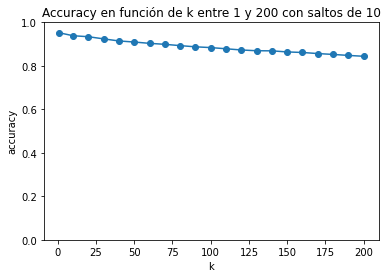

In [6]:
name = "../dataExp/expKNN_1-200.csv"
plot_accuracy_KNN(name, "Accuracy en función de k entre 1 y 200 con saltos de 10")

In [ ]:
name_1_10 = "../dataExp/expKNN_1-10.csv"
accuracy_1_10 = []
times_1_10 = []

total_instances = 10000
it_range = range(1,11)

for k in tqdm(it_range):
    time_init = time.perf_counter()
    acc = main("../data/train.csv", k, 0, "KNN", total_instances, 1000, 0.8, 1e-8)
    time_end = time.perf_counter()
    
    times_1_10.append(time_end-time_init)
    accuracy_1_10.append(acc)
np.savetxt(name_1_10, np.array([it_range, times_1_10, accuracy_1_10]).transpose(), delimiter=",")

 10%|█         | 1/10 [00:16<02:29, 16.58s/it]

Accuracy: 0.952


In [ ]:
name_1_10 = "../dataExp/expKNN_1-10.csv"
plot_accuracy_KNN(name_1_10, "Accuracy en función de k entre 1 y 10")

## KNN con PCA 
0 < alpha < 500, [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500] 

0 < k < 200 [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200]

In [ ]:
# experimenta con un set de alpha y ks
def experimentacion_k_alpha(namefile, ks, alphas, total_intances):
    accuracy_k_alpha_complete = []
    times_k_alpha_complete = []
    ks_complete = []
    alphas_complete = []

    with tqdm(total=len(ks) * len(alphas)) as pbar:
        for k in ks:
            for alpha in alphas:
                time_init = time.perf_counter()
                acc = main("../data/train.csv", k, alpha, "KNN_PCA", total_instances, 2500, 0.8, 1e-6)
                time_end = time.perf_counter()
                print(f"K: {k}, Alpha: {alpha}")

                times_k_alpha_complete.append(time_end-time_init)
                accuracy_k_alpha_complete.append(acc)
                ks_complete.append(k)
                alphas_complete.append(alpha)

                pbar.update(1)

    np.savetxt(namefile, np.array([ks_complete, alphas_complete, times_k_alpha_complete, accuracy_k_alpha_complete]).transpose(), delimiter=",")

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Grafica los datos obtenidos para los distintos k y alpha
def plot_scatter(filename, title):
    columns = ["k", "alpha", "time", "acc"]
    df = pd.read_csv(filename, names=columns)

    x = [str(i)[0:-2] for i in df["alpha"]]
    y = [str(i)[0:-2] for i in df["k"]]

    fig = plt.figure()
    colour = df["acc"]
    plt.scatter(x, y, s = 70, c = colour, alpha = 1, cmap="rainbow")
    plt.colorbar(label="accuracy")
    plt.xlabel("alpha")
    plt.ylabel('k',rotation=0)
    plt.title(title)
    plt.show()

In [4]:
name_k_alpha_complete = "../dataExp/KNN_PCA_complete.csv"
total_instances = 10000
ks = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200]
alphas = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200]

experimentacion_k_alpha(name_k_alpha_complete, ks, alphas, total_instances)


  1%|          | 1/144 [00:05<12:01,  5.05s/it]

Accuracy: 0.2515
K: 1, Alpha: 1


  1%|▏         | 2/144 [00:09<11:16,  4.77s/it]

Accuracy: 0.366
K: 1, Alpha: 2


  2%|▏         | 3/144 [00:14<10:49,  4.61s/it]

Accuracy: 0.476
K: 1, Alpha: 3


  3%|▎         | 4/144 [00:18<10:36,  4.54s/it]

Accuracy: 0.5835
K: 1, Alpha: 4


  3%|▎         | 5/144 [00:23<10:31,  4.54s/it]

Accuracy: 0.691
K: 1, Alpha: 5


  4%|▍         | 6/144 [00:27<10:34,  4.60s/it]

Accuracy: 0.8925
K: 1, Alpha: 10


  5%|▍         | 7/144 [00:33<11:10,  4.89s/it]

Accuracy: 0.951
K: 1, Alpha: 20


  6%|▌         | 8/144 [00:39<11:56,  5.27s/it]

Accuracy: 0.9655
K: 1, Alpha: 30


  6%|▋         | 9/144 [00:46<12:52,  5.72s/it]

Accuracy: 0.9645
K: 1, Alpha: 40


  7%|▋         | 10/144 [00:53<14:02,  6.29s/it]

Accuracy: 0.965
K: 1, Alpha: 50


  8%|▊         | 11/144 [01:06<18:29,  8.34s/it]

Accuracy: 0.963
K: 1, Alpha: 100


  8%|▊         | 12/144 [02:23<1:04:04, 29.12s/it]

Accuracy: 0.9525
K: 1, Alpha: 200


  9%|▉         | 13/144 [02:27<47:20, 21.69s/it]  

Accuracy: 0.2235
K: 2, Alpha: 1


 10%|▉         | 14/144 [02:32<35:44, 16.50s/it]

Accuracy: 0.3715
K: 2, Alpha: 2


 10%|█         | 15/144 [02:36<27:43, 12.89s/it]

Accuracy: 0.4535
K: 2, Alpha: 3


 11%|█         | 16/144 [02:41<22:09, 10.38s/it]

Accuracy: 0.5765
K: 2, Alpha: 4


 12%|█▏        | 17/144 [02:46<18:17,  8.64s/it]

Accuracy: 0.6755
K: 2, Alpha: 5


 12%|█▎        | 18/144 [02:50<15:45,  7.51s/it]

Accuracy: 0.879
K: 2, Alpha: 10


 13%|█▎        | 19/144 [02:56<14:25,  6.92s/it]

Accuracy: 0.9425
K: 2, Alpha: 20


 14%|█▍        | 20/144 [03:02<13:48,  6.68s/it]

Accuracy: 0.9555
K: 2, Alpha: 30


 15%|█▍        | 21/144 [03:09<13:42,  6.69s/it]

Accuracy: 0.954
K: 2, Alpha: 40


 15%|█▌        | 22/144 [03:16<14:00,  6.89s/it]

Accuracy: 0.9525
K: 2, Alpha: 50


 16%|█▌        | 23/144 [03:29<17:43,  8.79s/it]

Accuracy: 0.952
K: 2, Alpha: 100


 17%|█▋        | 24/144 [05:15<1:15:56, 37.97s/it]

Accuracy: 0.948
K: 2, Alpha: 200


 17%|█▋        | 25/144 [05:20<55:26, 27.96s/it]  

Accuracy: 0.222
K: 3, Alpha: 1


 18%|█▊        | 26/144 [05:25<41:10, 20.93s/it]

Accuracy: 0.36
K: 3, Alpha: 2


 19%|█▉        | 27/144 [05:29<31:15, 16.03s/it]

Accuracy: 0.425
K: 3, Alpha: 3


 19%|█▉        | 28/144 [05:34<24:23, 12.62s/it]

Accuracy: 0.5515
K: 3, Alpha: 4


 20%|██        | 29/144 [05:38<19:37, 10.24s/it]

Accuracy: 0.649
K: 3, Alpha: 5


 21%|██        | 30/144 [05:43<16:25,  8.64s/it]

Accuracy: 0.854
K: 3, Alpha: 10


 22%|██▏       | 31/144 [05:49<14:33,  7.73s/it]

Accuracy: 0.9255
K: 3, Alpha: 20


 22%|██▏       | 32/144 [05:55<13:38,  7.31s/it]

Accuracy: 0.9315
K: 3, Alpha: 30


 23%|██▎       | 33/144 [06:02<13:17,  7.18s/it]

Accuracy: 0.935
K: 3, Alpha: 40


 24%|██▎       | 34/144 [06:10<13:25,  7.32s/it]

Accuracy: 0.9335
K: 3, Alpha: 50


 24%|██▍       | 35/144 [06:23<16:29,  9.08s/it]

Accuracy: 0.9345
K: 3, Alpha: 100


 25%|██▌       | 36/144 [07:38<51:44, 28.75s/it]

Accuracy: 0.934
K: 3, Alpha: 200


 26%|██▌       | 37/144 [07:42<38:22, 21.52s/it]

Accuracy: 0.207
K: 4, Alpha: 1


 26%|██▋       | 38/144 [07:47<29:03, 16.44s/it]

Accuracy: 0.348
K: 4, Alpha: 2


 27%|██▋       | 39/144 [07:52<22:34, 12.90s/it]

Accuracy: 0.409
K: 4, Alpha: 3


 28%|██▊       | 40/144 [07:56<18:03, 10.42s/it]

Accuracy: 0.5315
K: 4, Alpha: 4


 28%|██▊       | 41/144 [08:01<14:56,  8.70s/it]

Accuracy: 0.6285
K: 4, Alpha: 5


 29%|██▉       | 42/144 [08:06<12:51,  7.56s/it]

Accuracy: 0.825
K: 4, Alpha: 10


 30%|██▉       | 43/144 [08:12<11:50,  7.04s/it]

Accuracy: 0.904
K: 4, Alpha: 20


 31%|███       | 44/144 [08:18<11:24,  6.84s/it]

Accuracy: 0.9145
K: 4, Alpha: 30


 31%|███▏      | 45/144 [08:25<11:18,  6.86s/it]

Accuracy: 0.9165
K: 4, Alpha: 40


 32%|███▏      | 46/144 [08:33<11:39,  7.14s/it]

Accuracy: 0.9185
K: 4, Alpha: 50


 33%|███▎      | 47/144 [08:46<14:30,  8.97s/it]

Accuracy: 0.9145
K: 4, Alpha: 100


 33%|███▎      | 48/144 [11:45<1:36:00, 60.00s/it]

Accuracy: 0.916
K: 4, Alpha: 200


 34%|███▍      | 49/144 [11:50<1:08:52, 43.50s/it]

Accuracy: 0.205
K: 5, Alpha: 1


 35%|███▍      | 50/144 [11:55<50:02, 31.94s/it]  

Accuracy: 0.3365
K: 5, Alpha: 2


 35%|███▌      | 51/144 [12:00<36:50, 23.77s/it]

Accuracy: 0.393
K: 5, Alpha: 3


 36%|███▌      | 52/144 [12:04<27:39, 18.04s/it]

Accuracy: 0.51
K: 5, Alpha: 4


 37%|███▋      | 53/144 [12:09<21:19, 14.06s/it]

Accuracy: 0.6065
K: 5, Alpha: 5


 38%|███▊      | 54/144 [12:14<17:00, 11.34s/it]

Accuracy: 0.805
K: 5, Alpha: 10


 38%|███▊      | 55/144 [12:20<14:22,  9.69s/it]

Accuracy: 0.882
K: 5, Alpha: 20


 39%|███▉      | 56/144 [12:26<12:42,  8.67s/it]

Accuracy: 0.8985
K: 5, Alpha: 30


 40%|███▉      | 57/144 [12:33<11:50,  8.17s/it]

Accuracy: 0.9055
K: 5, Alpha: 40


 40%|████      | 58/144 [12:41<11:28,  8.00s/it]

Accuracy: 0.9005
K: 5, Alpha: 50


 41%|████      | 59/144 [12:54<13:24,  9.46s/it]

Accuracy: 0.8965
K: 5, Alpha: 100


 42%|████▏     | 60/144 [13:43<30:03, 21.47s/it]

Accuracy: 0.895
K: 5, Alpha: 200


 42%|████▏     | 61/144 [13:48<22:51, 16.53s/it]

Accuracy: 0.18
K: 10, Alpha: 1


 43%|████▎     | 62/144 [13:53<17:47, 13.02s/it]

Accuracy: 0.2965
K: 10, Alpha: 2


 44%|████▍     | 63/144 [13:58<14:18, 10.60s/it]

Accuracy: 0.34
K: 10, Alpha: 3


 44%|████▍     | 64/144 [14:03<11:50,  8.88s/it]

Accuracy: 0.436
K: 10, Alpha: 4


 45%|████▌     | 65/144 [14:08<10:08,  7.71s/it]

Accuracy: 0.528
K: 10, Alpha: 5


 46%|████▌     | 66/144 [14:13<09:03,  6.97s/it]

Accuracy: 0.7185
K: 10, Alpha: 10


 47%|████▋     | 67/144 [14:19<08:34,  6.69s/it]

Accuracy: 0.8155
K: 10, Alpha: 20


 47%|████▋     | 68/144 [14:26<08:27,  6.67s/it]

Accuracy: 0.8235
K: 10, Alpha: 30


 48%|████▊     | 69/144 [14:33<08:35,  6.87s/it]

Accuracy: 0.831
K: 10, Alpha: 40


 49%|████▊     | 70/144 [14:42<09:04,  7.35s/it]

Accuracy: 0.828
K: 10, Alpha: 50


 49%|████▉     | 71/144 [14:58<12:15, 10.08s/it]

Accuracy: 0.8275
K: 10, Alpha: 100


 50%|█████     | 72/144 [18:41<1:28:54, 74.09s/it]

Accuracy: 0.8245
K: 10, Alpha: 200


 51%|█████     | 73/144 [18:47<1:03:26, 53.62s/it]

Accuracy: 0.149
K: 20, Alpha: 1


 51%|█████▏    | 74/144 [18:53<45:47, 39.25s/it]  

Accuracy: 0.2525
K: 20, Alpha: 2


 52%|█████▏    | 75/144 [18:59<33:35, 29.22s/it]

Accuracy: 0.2805
K: 20, Alpha: 3


 53%|█████▎    | 76/144 [19:05<25:08, 22.18s/it]

Accuracy: 0.363
K: 20, Alpha: 4


 53%|█████▎    | 77/144 [19:11<19:25, 17.39s/it]

Accuracy: 0.4435
K: 20, Alpha: 5


 54%|█████▍    | 78/144 [19:17<15:29, 14.08s/it]

Accuracy: 0.607
K: 20, Alpha: 10


 55%|█████▍    | 79/144 [19:25<13:08, 12.13s/it]

Accuracy: 0.7005
K: 20, Alpha: 20


 56%|█████▌    | 80/144 [19:33<11:50, 11.11s/it]

Accuracy: 0.711
K: 20, Alpha: 30


 56%|█████▋    | 81/144 [19:42<10:57, 10.44s/it]

Accuracy: 0.714
K: 20, Alpha: 40


 57%|█████▋    | 82/144 [19:53<10:48, 10.45s/it]

Accuracy: 0.7195
K: 20, Alpha: 50


 58%|█████▊    | 83/144 [20:14<13:49, 13.61s/it]

Accuracy: 0.7165
K: 20, Alpha: 100


 58%|█████▊    | 84/144 [22:36<52:19, 52.33s/it]

Accuracy: 0.705
K: 20, Alpha: 200


 59%|█████▉    | 85/144 [22:43<37:50, 38.49s/it]

Accuracy: 0.1395
K: 30, Alpha: 1


 60%|█████▉    | 86/144 [22:49<27:54, 28.88s/it]

Accuracy: 0.23
K: 30, Alpha: 2


 60%|██████    | 87/144 [22:55<21:01, 22.14s/it]

Accuracy: 0.249
K: 30, Alpha: 3


 61%|██████    | 88/144 [23:02<16:15, 17.42s/it]

Accuracy: 0.3155
K: 30, Alpha: 4


 62%|██████▏   | 89/144 [23:08<12:58, 14.16s/it]

Accuracy: 0.3895
K: 30, Alpha: 5


 62%|██████▎   | 90/144 [23:15<10:41, 11.89s/it]

Accuracy: 0.533
K: 30, Alpha: 10


 63%|██████▎   | 91/144 [23:23<09:25, 10.66s/it]

Accuracy: 0.6095
K: 30, Alpha: 20


 64%|██████▍   | 92/144 [23:31<08:39,  9.99s/it]

Accuracy: 0.623
K: 30, Alpha: 30


 65%|██████▍   | 93/144 [23:40<08:14,  9.70s/it]

Accuracy: 0.6265
K: 30, Alpha: 40


 65%|██████▌   | 94/144 [23:50<08:04,  9.70s/it]

Accuracy: 0.624
K: 30, Alpha: 50


 66%|██████▌   | 95/144 [24:05<09:19, 11.42s/it]

Accuracy: 0.618
K: 30, Alpha: 100


 67%|██████▋   | 96/144 [26:17<37:57, 47.44s/it]

Accuracy: 0.6195
K: 30, Alpha: 200


 67%|██████▋   | 97/144 [26:23<27:32, 35.16s/it]

Accuracy: 0.1325
K: 40, Alpha: 1


 68%|██████▊   | 98/144 [26:30<20:22, 26.58s/it]

Accuracy: 0.2175
K: 40, Alpha: 2


 69%|██████▉   | 99/144 [26:37<15:29, 20.66s/it]

Accuracy: 0.2345
K: 40, Alpha: 3


 69%|██████▉   | 100/144 [26:44<12:08, 16.55s/it]

Accuracy: 0.2855
K: 40, Alpha: 4


 70%|███████   | 101/144 [26:51<09:49, 13.72s/it]

Accuracy: 0.346
K: 40, Alpha: 5


 71%|███████   | 102/144 [26:58<08:15, 11.79s/it]

Accuracy: 0.4725
K: 40, Alpha: 10


 72%|███████▏  | 103/144 [27:06<07:14, 10.60s/it]

Accuracy: 0.552
K: 40, Alpha: 20


 72%|███████▏  | 104/144 [27:15<06:41, 10.03s/it]

Accuracy: 0.567
K: 40, Alpha: 30


 73%|███████▎  | 105/144 [27:23<06:16,  9.65s/it]

Accuracy: 0.564
K: 40, Alpha: 40


 74%|███████▎  | 106/144 [27:33<06:07,  9.67s/it]

Accuracy: 0.5625
K: 40, Alpha: 50


 74%|███████▍  | 107/144 [27:49<07:08, 11.59s/it]

Accuracy: 0.5535
K: 40, Alpha: 100


 75%|███████▌  | 108/144 [31:59<49:52, 83.13s/it]

Accuracy: 0.551
K: 40, Alpha: 200


 76%|███████▌  | 109/144 [32:06<35:09, 60.26s/it]

Accuracy: 0.1255
K: 50, Alpha: 1


 76%|███████▋  | 110/144 [32:13<25:04, 44.25s/it]

Accuracy: 0.2015
K: 50, Alpha: 2


 77%|███████▋  | 111/144 [32:20<18:10, 33.05s/it]

Accuracy: 0.221
K: 50, Alpha: 3


 78%|███████▊  | 112/144 [32:27<13:27, 25.24s/it]

Accuracy: 0.2665
K: 50, Alpha: 4


 78%|███████▊  | 113/144 [32:34<10:12, 19.77s/it]

Accuracy: 0.3135
K: 50, Alpha: 5


 79%|███████▉  | 114/144 [32:41<08:02, 16.07s/it]

Accuracy: 0.434
K: 50, Alpha: 10


 80%|███████▉  | 115/144 [32:50<06:39, 13.78s/it]

Accuracy: 0.4965
K: 50, Alpha: 20


 81%|████████  | 116/144 [32:58<05:41, 12.21s/it]

Accuracy: 0.5045
K: 50, Alpha: 30


 81%|████████▏ | 117/144 [33:08<05:08, 11.42s/it]

Accuracy: 0.506
K: 50, Alpha: 40


 82%|████████▏ | 118/144 [33:19<04:55, 11.37s/it]

Accuracy: 0.5015
K: 50, Alpha: 50


 83%|████████▎ | 119/144 [33:36<05:22, 12.91s/it]

Accuracy: 0.504
K: 50, Alpha: 100


 83%|████████▎ | 120/144 [36:05<21:31, 53.80s/it]

Accuracy: 0.507
K: 50, Alpha: 200


 84%|████████▍ | 121/144 [36:14<15:29, 40.43s/it]

Accuracy: 0.104
K: 100, Alpha: 1


 85%|████████▍ | 122/144 [36:24<11:24, 31.12s/it]

Accuracy: 0.162
K: 100, Alpha: 2


 85%|████████▌ | 123/144 [36:33<08:36, 24.60s/it]

Accuracy: 0.178
K: 100, Alpha: 3


 86%|████████▌ | 124/144 [36:43<06:42, 20.10s/it]

Accuracy: 0.1955
K: 100, Alpha: 4


 87%|████████▋ | 125/144 [36:52<05:21, 16.94s/it]

Accuracy: 0.2285
K: 100, Alpha: 5


 88%|████████▊ | 126/144 [37:02<04:25, 14.77s/it]

Accuracy: 0.3165
K: 100, Alpha: 10


 88%|████████▊ | 127/144 [37:12<03:49, 13.50s/it]

Accuracy: 0.346
K: 100, Alpha: 20


 89%|████████▉ | 128/144 [37:23<03:23, 12.74s/it]

Accuracy: 0.3435
K: 100, Alpha: 30


 90%|████████▉ | 129/144 [37:35<03:05, 12.34s/it]

Accuracy: 0.3505
K: 100, Alpha: 40


 90%|█████████ | 130/144 [37:47<02:52, 12.33s/it]

Accuracy: 0.352
K: 100, Alpha: 50


 91%|█████████ | 131/144 [38:05<03:03, 14.10s/it]

Accuracy: 0.35
K: 100, Alpha: 100


 92%|█████████▏| 132/144 [39:36<07:24, 37.04s/it]

Accuracy: 0.3495
K: 100, Alpha: 200


 92%|█████████▏| 133/144 [39:50<05:32, 30.26s/it]

Accuracy: 0.0995
K: 200, Alpha: 1


 93%|█████████▎| 134/144 [40:05<04:16, 25.69s/it]

Accuracy: 0.124
K: 200, Alpha: 2


 94%|█████████▍| 135/144 [40:20<03:20, 22.30s/it]

Accuracy: 0.136
K: 200, Alpha: 3


 94%|█████████▍| 136/144 [40:35<02:40, 20.08s/it]

Accuracy: 0.1365
K: 200, Alpha: 4


 95%|█████████▌| 137/144 [40:49<02:09, 18.46s/it]

Accuracy: 0.1515
K: 200, Alpha: 5


 96%|█████████▌| 138/144 [41:04<01:43, 17.28s/it]

Accuracy: 0.171
K: 200, Alpha: 10


 97%|█████████▋| 139/144 [41:19<01:23, 16.74s/it]

Accuracy: 0.193
K: 200, Alpha: 20


 97%|█████████▋| 140/144 [41:36<01:07, 16.78s/it]

Accuracy: 0.192
K: 200, Alpha: 30


 98%|█████████▊| 141/144 [41:53<00:50, 16.78s/it]

Accuracy: 0.192
K: 200, Alpha: 40


 99%|█████████▊| 142/144 [42:11<00:34, 17.04s/it]

Accuracy: 0.1935
K: 200, Alpha: 50


 99%|█████████▉| 143/144 [42:34<00:18, 18.94s/it]

Accuracy: 0.2025
K: 200, Alpha: 100


100%|██████████| 144/144 [43:58<00:00, 18.32s/it]

Accuracy: 0.2045
K: 200, Alpha: 200


- Graficos: 15 graficos con k fijo, acc(alpha)
- Mismo grafico todos overlapeados
- Alpha en X, k en Y, colorcitos para rangos de acc(rojo, amarrillo verde)


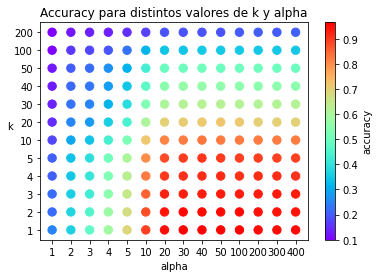

In [16]:
name_k_alpha_complete = "../dataExp/KNN_PCA_complete.csv"
plot_scatter(name_k_alpha_complete, "Accuracy para distintos valores de k y alpha")


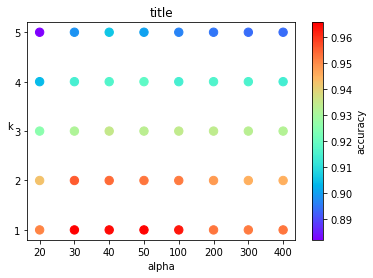

In [32]:
import matplotlib.pyplot as plt
import numpy as np

filename = "../dataExp/KNN_PCA_complete.csv"

# Grafica los datos obtenidos para los distintos k y alpha
columns = ["k", "alpha", "time", "acc"]
df = pd.read_csv(filename, names=columns)
df_k_limit = df[df["k"] < 10]
df_alpha_limit = df_k_limit[df_k_limit["alpha"] > 10] 

x = [str(i)[0:-2] for i in df_alpha_limit["alpha"]]
y = [str(i)[0:-2] for i in df_alpha_limit["k"]]

fig = plt.figure()
colour = df_alpha_limit["acc"]
plt.scatter(x, y, s = 70, c = colour, alpha = 1, cmap="rainbow")
plt.colorbar(label="accuracy")
plt.xlabel("alpha")
plt.ylabel('k',rotation=0)
plt.title("title")
plt.show()

In [11]:
name_k_alpha_complete = "../dataExp/KNN_PCA_complete_200_500.csv"
accuracy_k_alpha_complete = []
times_k_alpha_complete = []
ks_complete = []
alphas_complete = []

total_instances = 10000
ks = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200]
alphas = [300, 400]

with tqdm(total=len(ks) * len(alphas)) as pbar:
    for k in ks:
        for alpha in alphas:
            time_init = time.perf_counter()
            acc = main("../data/train.csv", k, alpha, "KNN_PCA", total_instances, 2500, 0.8, 1e-6)
            time_end = time.perf_counter()
            print(f"K: {k}, Alpha: {alpha}")
    
            times_k_alpha_complete.append(time_end-time_init)
            accuracy_k_alpha_complete.append(acc)
            ks_complete.append(k)
            alphas_complete.append(alpha)
            
            pbar.update(1)

np.savetxt(name_k_alpha_complete, np.array([ks_complete, alphas_complete, times_k_alpha_complete, accuracy_k_alpha_complete]).transpose(), delimiter=",")

  4%|▍         | 1/24 [04:35<1:45:37, 275.52s/it]

Accuracy: 0.952
K: 1, Alpha: 300


  8%|▊         | 2/24 [13:40<2:39:09, 434.07s/it]

Accuracy: 0.9525
K: 1, Alpha: 400


 12%|█▎        | 3/24 [21:25<2:36:49, 448.09s/it]

Accuracy: 0.945
K: 2, Alpha: 300


 17%|█▋        | 4/24 [33:28<3:05:33, 556.69s/it]

Accuracy: 0.945
K: 2, Alpha: 400


 21%|██        | 5/24 [40:02<2:37:45, 498.18s/it]

Accuracy: 0.933
K: 3, Alpha: 300


 25%|██▌       | 6/24 [48:07<2:28:05, 493.66s/it]

Accuracy: 0.9325
K: 3, Alpha: 400


 29%|██▉       | 7/24 [55:59<2:17:49, 486.43s/it]

Accuracy: 0.9155
K: 4, Alpha: 300


 33%|███▎      | 8/24 [1:05:16<2:15:44, 509.01s/it]

Accuracy: 0.914
K: 4, Alpha: 400


 38%|███▊      | 9/24 [1:14:59<2:13:00, 532.01s/it]

Accuracy: 0.894
K: 5, Alpha: 300


 42%|████▏     | 10/24 [1:24:48<2:08:15, 549.68s/it]

Accuracy: 0.894
K: 5, Alpha: 400


 46%|████▌     | 11/24 [1:33:56<1:58:58, 549.11s/it]

Accuracy: 0.8245
K: 10, Alpha: 300


 50%|█████     | 12/24 [1:47:01<2:04:10, 620.89s/it]

Accuracy: 0.824
K: 10, Alpha: 400


 54%|█████▍    | 13/24 [1:58:37<1:57:59, 643.55s/it]

Accuracy: 0.702
K: 20, Alpha: 300


 58%|█████▊    | 14/24 [2:04:12<1:31:45, 550.57s/it]

Accuracy: 0.7015
K: 20, Alpha: 400


 62%|██████▎   | 15/24 [2:11:43<1:18:05, 520.56s/it]

Accuracy: 0.6185
K: 30, Alpha: 300


 67%|██████▋   | 16/24 [2:31:01<1:34:59, 712.41s/it]

Accuracy: 0.619
K: 30, Alpha: 400


 71%|███████   | 17/24 [2:39:06<1:15:06, 643.83s/it]

Accuracy: 0.553
K: 40, Alpha: 300


 75%|███████▌  | 18/24 [2:49:49<1:04:22, 643.76s/it]

Accuracy: 0.5505
K: 40, Alpha: 400


 79%|███████▉  | 19/24 [2:53:04<42:25, 509.00s/it]  

Accuracy: 0.503
K: 50, Alpha: 300


 83%|████████▎ | 20/24 [3:02:12<34:42, 520.72s/it]

Accuracy: 0.499
K: 50, Alpha: 400


 88%|████████▊ | 21/24 [3:06:33<22:08, 442.69s/it]

Accuracy: 0.3475
K: 100, Alpha: 300


 92%|█████████▏| 22/24 [3:12:36<13:57, 418.70s/it]

Accuracy: 0.348
K: 100, Alpha: 400


 96%|█████████▌| 23/24 [3:23:53<08:16, 496.31s/it]

Accuracy: 0.204
K: 200, Alpha: 300


100%|██████████| 24/24 [3:32:10<00:00, 530.46s/it]

Accuracy: 0.206
K: 200, Alpha: 400


In [5]:
name_k_alpha_complete = "../dataExp/KNN_PCA_extense.csv"
accuracy_k_alpha_complete = []
times_k_alpha_complete = []
ks_complete = []
alphas_complete = []

total_instances = 10000
ks = range(1,11)
alphas = range(10,201,10)

with tqdm(total=len(ks) * len(alphas)) as pbar:
    for k in ks:
        for alpha in alphas:
            time_init = time.perf_counter()
            acc = main("../data/train.csv", k, alpha, "KNN_PCA", total_instances, 2500, 0.8, 1e-6)
            time_end = time.perf_counter()
            print(f"K: {k}, Alpha: {alpha}")
    
            times_k_alpha_complete.append(time_end-time_init)
            accuracy_k_alpha_complete.append(acc)
            ks_complete.append(k)
            alphas_complete.append(alpha)
            
            pbar.update(1)

np.savetxt(name_k_alpha_complete, np.array([ks_complete, alphas_complete, times_k_alpha_complete, accuracy_k_alpha_complete]).transpose(), delimiter=",")

  0%|          | 1/200 [00:05<17:04,  5.15s/it]

Accuracy: 0.8925
K: 1, Alpha: 10


  1%|          | 2/200 [00:10<18:15,  5.53s/it]

Accuracy: 0.951
K: 1, Alpha: 20


  2%|▏         | 3/200 [00:17<19:24,  5.91s/it]

Accuracy: 0.9655
K: 1, Alpha: 30


  2%|▏         | 4/200 [00:24<20:52,  6.39s/it]

Accuracy: 0.9645
K: 1, Alpha: 40


  2%|▎         | 5/200 [00:32<22:35,  6.95s/it]

Accuracy: 0.965
K: 1, Alpha: 50


  3%|▎         | 6/200 [00:42<25:59,  8.04s/it]

Accuracy: 0.9625
K: 1, Alpha: 60


  4%|▎         | 7/200 [00:53<28:54,  8.99s/it]

Accuracy: 0.9635
K: 1, Alpha: 70


  4%|▍         | 8/200 [01:05<32:22, 10.12s/it]

Accuracy: 0.964
K: 1, Alpha: 80


  4%|▍         | 9/200 [01:19<36:03, 11.33s/it]

Accuracy: 0.9625
K: 1, Alpha: 90


  5%|▌         | 10/200 [01:36<40:31, 12.80s/it]

Accuracy: 0.963
K: 1, Alpha: 100


  6%|▌         | 11/200 [01:54<45:38, 14.49s/it]

Accuracy: 0.96
K: 1, Alpha: 110


  6%|▌         | 12/200 [02:13<50:07, 16.00s/it]

Accuracy: 0.959
K: 1, Alpha: 120


  6%|▋         | 13/200 [02:36<55:51, 17.92s/it]

Accuracy: 0.9575
K: 1, Alpha: 130


  7%|▋         | 14/200 [02:58<59:44, 19.27s/it]

Accuracy: 0.9565
K: 1, Alpha: 140


  8%|▊         | 15/200 [03:24<1:05:13, 21.15s/it]

Accuracy: 0.9585
K: 1, Alpha: 150


  8%|▊         | 16/200 [04:09<1:27:20, 28.48s/it]

Accuracy: 0.9575
K: 1, Alpha: 160


  8%|▊         | 17/200 [08:24<4:54:51, 96.68s/it]

Accuracy: 0.9575
K: 1, Alpha: 170


  9%|▉         | 18/200 [10:10<5:01:41, 99.46s/it]

Accuracy: 0.955
K: 1, Alpha: 180


 10%|▉         | 19/200 [11:15<4:28:34, 89.03s/it]

Accuracy: 0.9535
K: 1, Alpha: 190


 10%|█         | 20/200 [13:52<5:28:11, 109.40s/it]

Accuracy: 0.9525
K: 1, Alpha: 200


 10%|█         | 21/200 [13:57<3:52:57, 78.09s/it] 

Accuracy: 0.879
K: 2, Alpha: 10


 11%|█         | 22/200 [14:03<2:47:34, 56.48s/it]

Accuracy: 0.9425
K: 2, Alpha: 20


 12%|█▏        | 23/200 [14:10<2:02:40, 41.59s/it]

Accuracy: 0.9555
K: 2, Alpha: 30


 12%|█▏        | 24/200 [14:17<1:31:57, 31.35s/it]

Accuracy: 0.954
K: 2, Alpha: 40


 12%|█▎        | 25/200 [14:26<1:11:10, 24.41s/it]

Accuracy: 0.9525
K: 2, Alpha: 50


 13%|█▎        | 26/200 [14:36<58:17, 20.10s/it]  

Accuracy: 0.9515
K: 2, Alpha: 60


 14%|█▎        | 27/200 [14:47<50:02, 17.35s/it]

Accuracy: 0.953
K: 2, Alpha: 70


 14%|█▍        | 28/200 [14:58<44:48, 15.63s/it]

Accuracy: 0.9515
K: 2, Alpha: 80


 14%|█▍        | 29/200 [15:12<42:48, 15.02s/it]

Accuracy: 0.951
K: 2, Alpha: 90


 15%|█▌        | 30/200 [15:28<43:24, 15.32s/it]

Accuracy: 0.952
K: 2, Alpha: 100


 16%|█▌        | 31/200 [15:44<43:57, 15.61s/it]

Accuracy: 0.953
K: 2, Alpha: 110


 16%|█▌        | 32/200 [16:02<45:18, 16.18s/it]

Accuracy: 0.9525
K: 2, Alpha: 120


 16%|█▋        | 33/200 [16:22<48:37, 17.47s/it]

Accuracy: 0.9525
K: 2, Alpha: 130


 17%|█▋        | 34/200 [16:45<53:06, 19.20s/it]

Accuracy: 0.9505
K: 2, Alpha: 140


 18%|█▊        | 35/200 [17:11<57:42, 20.99s/it]

Accuracy: 0.9505
K: 2, Alpha: 150


 18%|█▊        | 36/200 [17:50<1:12:21, 26.48s/it]

Accuracy: 0.9505
K: 2, Alpha: 160


 18%|█▊        | 37/200 [18:49<1:38:54, 36.41s/it]

Accuracy: 0.949
K: 2, Alpha: 170


 19%|█▉        | 38/200 [19:26<1:38:33, 36.50s/it]

Accuracy: 0.9485
K: 2, Alpha: 180


 20%|█▉        | 39/200 [21:25<2:43:53, 61.08s/it]

Accuracy: 0.9495
K: 2, Alpha: 190


 20%|██        | 40/200 [24:48<4:36:31, 103.69s/it]

Accuracy: 0.948
K: 2, Alpha: 200


 20%|██        | 41/200 [24:53<3:16:19, 74.08s/it] 

Accuracy: 0.854
K: 3, Alpha: 10


 21%|██        | 42/200 [24:59<2:21:47, 53.85s/it]

Accuracy: 0.9255
K: 3, Alpha: 20


 22%|██▏       | 43/200 [25:06<1:43:56, 39.72s/it]

Accuracy: 0.9315
K: 3, Alpha: 30


 22%|██▏       | 44/200 [25:13<1:18:01, 30.01s/it]

Accuracy: 0.935
K: 3, Alpha: 40


 22%|██▎       | 45/200 [25:22<1:00:34, 23.45s/it]

Accuracy: 0.9335
K: 3, Alpha: 50


 23%|██▎       | 46/200 [25:31<49:35, 19.32s/it]  

Accuracy: 0.938
K: 3, Alpha: 60


 24%|██▎       | 47/200 [25:43<43:31, 17.07s/it]

Accuracy: 0.9345
K: 3, Alpha: 70


 24%|██▍       | 48/200 [25:56<39:53, 15.74s/it]

Accuracy: 0.935
K: 3, Alpha: 80


 24%|██▍       | 49/200 [26:10<38:35, 15.34s/it]

Accuracy: 0.935
K: 3, Alpha: 90


 25%|██▌       | 50/200 [26:26<38:39, 15.46s/it]

Accuracy: 0.9345
K: 3, Alpha: 100


 26%|██▌       | 51/200 [26:42<39:17, 15.82s/it]

Accuracy: 0.9385
K: 3, Alpha: 110


 26%|██▌       | 52/200 [27:00<40:30, 16.42s/it]

Accuracy: 0.9375
K: 3, Alpha: 120


 26%|██▋       | 53/200 [27:19<41:56, 17.12s/it]

Accuracy: 0.935
K: 3, Alpha: 130


 27%|██▋       | 54/200 [27:41<45:04, 18.52s/it]

Accuracy: 0.934
K: 3, Alpha: 140


 28%|██▊       | 55/200 [28:09<51:34, 21.34s/it]

Accuracy: 0.9335
K: 3, Alpha: 150


 28%|██▊       | 56/200 [30:05<1:59:36, 49.84s/it]

Accuracy: 0.935
K: 3, Alpha: 160


 28%|██▊       | 57/200 [30:58<2:00:41, 50.64s/it]

Accuracy: 0.935
K: 3, Alpha: 170


 29%|██▉       | 58/200 [31:48<1:59:38, 50.55s/it]

Accuracy: 0.9345
K: 3, Alpha: 180


 30%|██▉       | 59/200 [34:09<3:02:42, 77.75s/it]

Accuracy: 0.936
K: 3, Alpha: 190


 30%|███       | 60/200 [36:38<3:51:26, 99.19s/it]

Accuracy: 0.934
K: 3, Alpha: 200


 30%|███       | 61/200 [36:43<2:44:21, 70.95s/it]

Accuracy: 0.825
K: 4, Alpha: 10


 31%|███       | 62/200 [36:49<1:58:15, 51.42s/it]

Accuracy: 0.904
K: 4, Alpha: 20


 32%|███▏      | 63/200 [36:56<1:26:42, 37.97s/it]

Accuracy: 0.9145
K: 4, Alpha: 30


 32%|███▏      | 64/200 [37:03<1:05:12, 28.77s/it]

Accuracy: 0.9165
K: 4, Alpha: 40


 32%|███▎      | 65/200 [37:11<50:47, 22.58s/it]  

Accuracy: 0.9185
K: 4, Alpha: 50


 33%|███▎      | 66/200 [37:23<42:55, 19.22s/it]

Accuracy: 0.919
K: 4, Alpha: 60


 34%|███▎      | 67/200 [37:34<37:10, 16.77s/it]

Accuracy: 0.913
K: 4, Alpha: 70


 34%|███▍      | 68/200 [37:46<34:08, 15.52s/it]

Accuracy: 0.912
K: 4, Alpha: 80


 34%|███▍      | 69/200 [38:00<32:49, 15.03s/it]

Accuracy: 0.913
K: 4, Alpha: 90


 35%|███▌      | 70/200 [38:15<32:13, 14.87s/it]

Accuracy: 0.9145
K: 4, Alpha: 100


 36%|███▌      | 71/200 [38:33<33:58, 15.80s/it]

Accuracy: 0.9135
K: 4, Alpha: 110


 36%|███▌      | 72/200 [38:52<35:46, 16.77s/it]

Accuracy: 0.918
K: 4, Alpha: 120


 36%|███▋      | 73/200 [39:12<37:44, 17.83s/it]

Accuracy: 0.9165
K: 4, Alpha: 130


 37%|███▋      | 74/200 [39:33<39:09, 18.65s/it]

Accuracy: 0.9175
K: 4, Alpha: 140


 38%|███▊      | 75/200 [39:56<41:52, 20.10s/it]

Accuracy: 0.915
K: 4, Alpha: 150


 38%|███▊      | 76/200 [40:34<52:39, 25.48s/it]

Accuracy: 0.917
K: 4, Alpha: 160


 38%|███▊      | 77/200 [41:26<1:08:35, 33.46s/it]

Accuracy: 0.9175
K: 4, Alpha: 170


 39%|███▉      | 78/200 [42:00<1:08:06, 33.49s/it]

Accuracy: 0.9155
K: 4, Alpha: 180


 40%|███▉      | 79/200 [46:29<3:30:18, 104.29s/it]

Accuracy: 0.916
K: 4, Alpha: 190


 40%|████      | 80/200 [48:29<3:37:36, 108.80s/it]

Accuracy: 0.916
K: 4, Alpha: 200


 40%|████      | 81/200 [48:34<2:34:06, 77.70s/it] 

Accuracy: 0.805
K: 5, Alpha: 10


 41%|████      | 82/200 [48:40<1:50:41, 56.28s/it]

Accuracy: 0.882
K: 5, Alpha: 20


 42%|████▏     | 83/200 [48:47<1:21:01, 41.55s/it]

Accuracy: 0.8985
K: 5, Alpha: 30


 42%|████▏     | 84/200 [48:55<1:00:41, 31.39s/it]

Accuracy: 0.9055
K: 5, Alpha: 40


 42%|████▎     | 85/200 [49:04<47:19, 24.69s/it]  

Accuracy: 0.9005
K: 5, Alpha: 50


 43%|████▎     | 86/200 [49:14<38:34, 20.30s/it]

Accuracy: 0.899
K: 5, Alpha: 60


 44%|████▎     | 87/200 [49:25<33:05, 17.57s/it]

Accuracy: 0.8945
K: 5, Alpha: 70


 44%|████▍     | 88/200 [49:38<29:56, 16.04s/it]

Accuracy: 0.8975
K: 5, Alpha: 80


 44%|████▍     | 89/200 [49:52<28:30, 15.41s/it]

Accuracy: 0.898
K: 5, Alpha: 90


 45%|████▌     | 90/200 [50:07<28:16, 15.42s/it]

Accuracy: 0.8965
K: 5, Alpha: 100


 46%|████▌     | 91/200 [50:24<28:37, 15.75s/it]

Accuracy: 0.897
K: 5, Alpha: 110


 46%|████▌     | 92/200 [50:42<29:35, 16.44s/it]

Accuracy: 0.8975
K: 5, Alpha: 120


 46%|████▋     | 93/200 [51:01<30:43, 17.23s/it]

Accuracy: 0.8985
K: 5, Alpha: 130


 47%|████▋     | 94/200 [51:23<32:58, 18.66s/it]

Accuracy: 0.896
K: 5, Alpha: 140


 48%|████▊     | 95/200 [51:47<35:25, 20.25s/it]

Accuracy: 0.895
K: 5, Alpha: 150


 48%|████▊     | 96/200 [52:29<46:26, 26.79s/it]

Accuracy: 0.8975
K: 5, Alpha: 160


 48%|████▊     | 97/200 [53:14<55:28, 32.31s/it]

Accuracy: 0.8955
K: 5, Alpha: 170


 49%|████▉     | 98/200 [54:26<1:15:03, 44.15s/it]

Accuracy: 0.896
K: 5, Alpha: 180


 50%|████▉     | 99/200 [57:08<2:14:09, 79.70s/it]

Accuracy: 0.8955
K: 5, Alpha: 190


 50%|█████     | 100/200 [59:36<2:46:46, 100.06s/it]

Accuracy: 0.895
K: 5, Alpha: 200


 50%|█████     | 101/200 [59:41<1:58:06, 71.58s/it] 

Accuracy: 0.7845
K: 6, Alpha: 10


 51%|█████     | 102/200 [59:47<1:24:48, 51.92s/it]

Accuracy: 0.866
K: 6, Alpha: 20


 52%|█████▏    | 103/200 [59:54<1:02:02, 38.38s/it]

Accuracy: 0.885
K: 6, Alpha: 30


 52%|█████▏    | 104/200 [1:00:01<46:35, 29.12s/it]

Accuracy: 0.888
K: 6, Alpha: 40


 52%|█████▎    | 105/200 [1:00:09<36:03, 22.78s/it]

Accuracy: 0.8865
K: 6, Alpha: 50


 53%|█████▎    | 106/200 [1:00:19<29:29, 18.82s/it]

Accuracy: 0.884
K: 6, Alpha: 60


 54%|█████▎    | 107/200 [1:00:30<25:33, 16.49s/it]

Accuracy: 0.883
K: 6, Alpha: 70


 54%|█████▍    | 108/200 [1:00:42<23:07, 15.08s/it]

Accuracy: 0.879
K: 6, Alpha: 80


 55%|█████▍    | 109/200 [1:00:55<22:00, 14.51s/it]

Accuracy: 0.882
K: 6, Alpha: 90


 55%|█████▌    | 110/200 [1:01:10<22:07, 14.75s/it]

Accuracy: 0.882
K: 6, Alpha: 100


 56%|█████▌    | 111/200 [1:01:27<22:37, 15.25s/it]

Accuracy: 0.8825
K: 6, Alpha: 110


 56%|█████▌    | 112/200 [1:01:45<23:41, 16.15s/it]

Accuracy: 0.884
K: 6, Alpha: 120


 56%|█████▋    | 113/200 [1:02:04<24:36, 16.97s/it]

Accuracy: 0.8825
K: 6, Alpha: 130


 57%|█████▋    | 114/200 [1:02:27<26:55, 18.78s/it]

Accuracy: 0.8815
K: 6, Alpha: 140


 57%|█████▊    | 115/200 [1:02:51<28:43, 20.28s/it]

Accuracy: 0.883
K: 6, Alpha: 150


 58%|█████▊    | 116/200 [1:03:47<43:41, 31.21s/it]

Accuracy: 0.883
K: 6, Alpha: 160


 58%|█████▊    | 117/200 [1:05:06<1:02:42, 45.33s/it]

Accuracy: 0.882
K: 6, Alpha: 170


 59%|█████▉    | 118/200 [1:06:13<1:11:11, 52.10s/it]

Accuracy: 0.882
K: 6, Alpha: 180


 60%|█████▉    | 119/200 [1:07:15<1:14:01, 54.83s/it]

Accuracy: 0.8825
K: 6, Alpha: 190


 60%|██████    | 120/200 [1:09:09<1:37:00, 72.76s/it]

Accuracy: 0.8815
K: 6, Alpha: 200


 60%|██████    | 121/200 [1:09:14<1:09:03, 52.44s/it]

Accuracy: 0.7705
K: 7, Alpha: 10


 61%|██████    | 122/200 [1:09:20<50:02, 38.49s/it]  

Accuracy: 0.85
K: 7, Alpha: 20


 62%|██████▏   | 123/200 [1:09:27<37:09, 28.96s/it]

Accuracy: 0.8665
K: 7, Alpha: 30


 62%|██████▏   | 124/200 [1:09:34<28:23, 22.42s/it]

Accuracy: 0.8715
K: 7, Alpha: 40


 62%|██████▎   | 125/200 [1:09:42<22:36, 18.08s/it]

Accuracy: 0.8685
K: 7, Alpha: 50


 63%|██████▎   | 126/200 [1:09:52<19:07, 15.50s/it]

Accuracy: 0.8695
K: 7, Alpha: 60


 64%|██████▎   | 127/200 [1:10:02<17:00, 13.98s/it]

Accuracy: 0.869
K: 7, Alpha: 70


 64%|██████▍   | 128/200 [1:10:14<15:57, 13.30s/it]

Accuracy: 0.8665
K: 7, Alpha: 80


 64%|██████▍   | 129/200 [1:10:27<15:40, 13.24s/it]

Accuracy: 0.8675
K: 7, Alpha: 90


 65%|██████▌   | 130/200 [1:10:42<16:05, 13.79s/it]

Accuracy: 0.8685
K: 7, Alpha: 100


 66%|██████▌   | 131/200 [1:10:58<16:30, 14.35s/it]

Accuracy: 0.871
K: 7, Alpha: 110


 66%|██████▌   | 132/200 [1:11:15<17:27, 15.40s/it]

Accuracy: 0.8695
K: 7, Alpha: 120


 66%|██████▋   | 133/200 [1:11:34<18:15, 16.35s/it]

Accuracy: 0.8685
K: 7, Alpha: 130


 67%|██████▋   | 134/200 [1:11:55<19:32, 17.77s/it]

Accuracy: 0.8675
K: 7, Alpha: 140


 68%|██████▊   | 135/200 [1:12:18<20:54, 19.30s/it]

Accuracy: 0.865
K: 7, Alpha: 150


 68%|██████▊   | 136/200 [1:13:00<27:58, 26.23s/it]

Accuracy: 0.8675
K: 7, Alpha: 160


 68%|██████▊   | 137/200 [1:14:21<44:42, 42.58s/it]

Accuracy: 0.8665
K: 7, Alpha: 170


 69%|██████▉   | 138/200 [1:15:04<43:58, 42.55s/it]

Accuracy: 0.868
K: 7, Alpha: 180


 70%|██████▉   | 139/200 [1:16:57<1:04:57, 63.90s/it]

Accuracy: 0.868
K: 7, Alpha: 190


 70%|███████   | 140/200 [1:18:13<1:07:32, 67.54s/it]

Accuracy: 0.8685
K: 7, Alpha: 200


 70%|███████   | 141/200 [1:18:19<48:02, 48.85s/it]  

Accuracy: 0.7445
K: 8, Alpha: 10


 71%|███████   | 142/200 [1:18:24<34:46, 35.98s/it]

Accuracy: 0.84
K: 8, Alpha: 20


 72%|███████▏  | 143/200 [1:18:31<25:49, 27.18s/it]

Accuracy: 0.851
K: 8, Alpha: 30


 72%|███████▏  | 144/200 [1:18:39<19:50, 21.26s/it]

Accuracy: 0.857
K: 8, Alpha: 40


 72%|███████▎  | 145/200 [1:18:47<15:54, 17.35s/it]

Accuracy: 0.8535
K: 8, Alpha: 50


 73%|███████▎  | 146/200 [1:18:57<13:35, 15.10s/it]

Accuracy: 0.8525
K: 8, Alpha: 60


 74%|███████▎  | 147/200 [1:19:07<12:08, 13.74s/it]

Accuracy: 0.8545
K: 8, Alpha: 70


 74%|███████▍  | 148/200 [1:19:19<11:19, 13.07s/it]

Accuracy: 0.854
K: 8, Alpha: 80


 74%|███████▍  | 149/200 [1:19:32<11:12, 13.18s/it]

Accuracy: 0.8515
K: 8, Alpha: 90


 75%|███████▌  | 150/200 [1:19:47<11:23, 13.66s/it]

Accuracy: 0.854
K: 8, Alpha: 100


 76%|███████▌  | 151/200 [1:20:03<11:45, 14.39s/it]

Accuracy: 0.8525
K: 8, Alpha: 110


 76%|███████▌  | 152/200 [1:20:22<12:37, 15.78s/it]

Accuracy: 0.854
K: 8, Alpha: 120


 76%|███████▋  | 153/200 [1:20:41<13:12, 16.85s/it]

Accuracy: 0.855
K: 8, Alpha: 130


 77%|███████▋  | 154/200 [1:21:03<13:56, 18.18s/it]

Accuracy: 0.856
K: 8, Alpha: 140


 78%|███████▊  | 155/200 [1:21:26<14:53, 19.86s/it]

Accuracy: 0.8545
K: 8, Alpha: 150


 78%|███████▊  | 156/200 [1:24:33<51:09, 69.77s/it]

Accuracy: 0.8555
K: 8, Alpha: 160


 78%|███████▊  | 157/200 [1:25:23<45:46, 63.88s/it]

Accuracy: 0.8535
K: 8, Alpha: 170


 79%|███████▉  | 158/200 [1:26:08<40:52, 58.39s/it]

Accuracy: 0.8515
K: 8, Alpha: 180


 80%|███████▉  | 159/200 [1:27:03<39:10, 57.34s/it]

Accuracy: 0.8515
K: 8, Alpha: 190


 80%|████████  | 160/200 [1:28:14<40:50, 61.26s/it]

Accuracy: 0.852
K: 8, Alpha: 200


 80%|████████  | 161/200 [1:28:19<28:53, 44.46s/it]

Accuracy: 0.7265
K: 9, Alpha: 10


 81%|████████  | 162/200 [1:28:25<20:53, 32.98s/it]

Accuracy: 0.828
K: 9, Alpha: 20


 82%|████████▏ | 163/200 [1:28:32<15:29, 25.13s/it]

Accuracy: 0.839
K: 9, Alpha: 30


 82%|████████▏ | 164/200 [1:28:39<11:54, 19.86s/it]

Accuracy: 0.8435
K: 9, Alpha: 40


 82%|████████▎ | 165/200 [1:28:48<09:33, 16.38s/it]

Accuracy: 0.8425
K: 9, Alpha: 50


 83%|████████▎ | 166/200 [1:28:57<08:08, 14.37s/it]

Accuracy: 0.8435
K: 9, Alpha: 60


 84%|████████▎ | 167/200 [1:29:08<07:19, 13.33s/it]

Accuracy: 0.84
K: 9, Alpha: 70


 84%|████████▍ | 168/200 [1:29:20<06:50, 12.84s/it]

Accuracy: 0.8435
K: 9, Alpha: 80


 84%|████████▍ | 169/200 [1:29:33<06:36, 12.80s/it]

Accuracy: 0.8415
K: 9, Alpha: 90


 85%|████████▌ | 170/200 [1:29:47<06:40, 13.35s/it]

Accuracy: 0.844
K: 9, Alpha: 100


 86%|████████▌ | 171/200 [1:30:03<06:50, 14.16s/it]

Accuracy: 0.845
K: 9, Alpha: 110


 86%|████████▌ | 172/200 [1:30:22<07:09, 15.35s/it]

Accuracy: 0.8435
K: 9, Alpha: 120


 86%|████████▋ | 173/200 [1:30:40<07:20, 16.32s/it]

Accuracy: 0.8445
K: 9, Alpha: 130


 87%|████████▋ | 174/200 [1:31:00<07:34, 17.48s/it]

Accuracy: 0.8435
K: 9, Alpha: 140


 88%|████████▊ | 175/200 [1:31:22<07:50, 18.82s/it]

Accuracy: 0.844
K: 9, Alpha: 150


 88%|████████▊ | 176/200 [1:32:27<13:04, 32.67s/it]

Accuracy: 0.8445
K: 9, Alpha: 160


 88%|████████▊ | 177/200 [1:33:29<15:51, 41.36s/it]

Accuracy: 0.845
K: 9, Alpha: 170


 89%|████████▉ | 178/200 [1:34:53<19:53, 54.27s/it]

Accuracy: 0.8425
K: 9, Alpha: 180


 90%|████████▉ | 179/200 [1:36:32<23:37, 67.50s/it]

Accuracy: 0.84
K: 9, Alpha: 190


 90%|█████████ | 180/200 [1:37:08<19:25, 58.26s/it]

Accuracy: 0.8385
K: 9, Alpha: 200


 90%|█████████ | 181/200 [1:37:14<13:25, 42.39s/it]

Accuracy: 0.7185
K: 10, Alpha: 10


 91%|█████████ | 182/200 [1:37:20<09:27, 31.55s/it]

Accuracy: 0.8155
K: 10, Alpha: 20


 92%|█████████▏| 183/200 [1:37:27<06:49, 24.11s/it]

Accuracy: 0.8235
K: 10, Alpha: 30


 92%|█████████▏| 184/200 [1:37:34<05:07, 19.21s/it]

Accuracy: 0.831
K: 10, Alpha: 40


 92%|█████████▎| 185/200 [1:37:43<03:59, 15.97s/it]

Accuracy: 0.828
K: 10, Alpha: 50


 93%|█████████▎| 186/200 [1:37:53<03:19, 14.22s/it]

Accuracy: 0.829
K: 10, Alpha: 60


 94%|█████████▎| 187/200 [1:38:04<02:50, 13.11s/it]

Accuracy: 0.8235
K: 10, Alpha: 70


 94%|█████████▍| 188/200 [1:38:16<02:33, 12.83s/it]

Accuracy: 0.8305
K: 10, Alpha: 80


 94%|█████████▍| 189/200 [1:38:29<02:21, 12.90s/it]

Accuracy: 0.8285
K: 10, Alpha: 90


 95%|█████████▌| 190/200 [1:38:45<02:17, 13.74s/it]

Accuracy: 0.8275
K: 10, Alpha: 100


 96%|█████████▌| 191/200 [1:39:01<02:10, 14.52s/it]

Accuracy: 0.8315
K: 10, Alpha: 110


 96%|█████████▌| 192/200 [1:39:19<02:04, 15.56s/it]

Accuracy: 0.8325
K: 10, Alpha: 120


 96%|█████████▋| 193/200 [1:39:39<01:58, 16.95s/it]

Accuracy: 0.8325
K: 10, Alpha: 130


 97%|█████████▋| 194/200 [1:40:00<01:49, 18.21s/it]

Accuracy: 0.8325
K: 10, Alpha: 140


 98%|█████████▊| 195/200 [1:40:23<01:38, 19.62s/it]

Accuracy: 0.8315
K: 10, Alpha: 150


 98%|█████████▊| 196/200 [1:41:06<01:46, 26.61s/it]

Accuracy: 0.832
K: 10, Alpha: 160


 98%|█████████▊| 197/200 [1:41:56<01:40, 33.53s/it]

Accuracy: 0.829
K: 10, Alpha: 170


 99%|█████████▉| 198/200 [1:43:42<01:50, 55.41s/it]

Accuracy: 0.826
K: 10, Alpha: 180


100%|█████████▉| 199/200 [1:44:50<00:59, 59.09s/it]

Accuracy: 0.8245
K: 10, Alpha: 190


100%|██████████| 200/200 [1:45:43<00:00, 31.72s/it]

Accuracy: 0.8245
K: 10, Alpha: 200


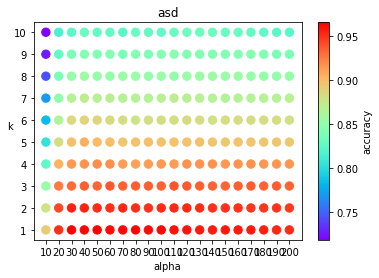

In [10]:
name_k_alpha_extense = "../dataExp/KNN_PCA_extense.csv"
plot_scatter(name_k_alpha_extense, "asd")

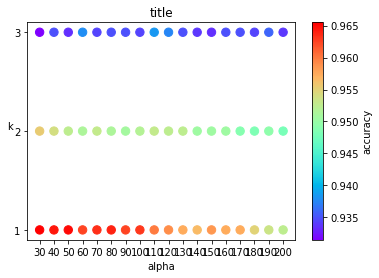

In [29]:
import matplotlib.pyplot as plt
import numpy as np

filename = "../dataExp/KNN_PCA_extense.csv"

# Grafica los datos obtenidos para los distintos k y alpha
columns = ["k", "alpha", "time", "acc"]
df = pd.read_csv(filename, names=columns)
df_k_limit = df[df["k"] < 4]
df_alpha_limit = df_k_limit[df_k_limit["alpha"] > 20] 

x = [str(i)[0:-2] for i in df_alpha_limit["alpha"]]
y = [str(i)[0:-2] for i in df_alpha_limit["k"]]

fig = plt.figure()
colour = df_alpha_limit["acc"]
plt.scatter(x, y, s = 70, c = colour, alpha = 1, cmap="rainbow")
plt.colorbar(label="accuracy")
plt.xlabel("alpha")
plt.ylabel('k',rotation=0)
plt.title("title")
plt.show()



##### Experimentar con el alpha
- Research paper de buenos alphas
- **Experimentar**: Experimentacion similar a la de K pero el inicial talvez mejor hasta 600 o algo del estilo para tener un panorama mas completo ya que no se espepra que al aumentarlo empeore necesariamente


# Experimentar con la cantidad de instancias 
- para distintos k/alpha?


# Posible metodo KNN pesado
- Por orden(sencillo pero no tan bueno talvez)
- Por distancia con peso

# Metricas para determinar los resultados obtenidos que no son accuracy
- Accuracy
- Curvas de precisión
- Recall
- Kappa de Cohen
- F1 Score

# Formas de tomar la data para entrenar
- Ver la distribución de los datos
- Como tomarlos

# Otros requisitos
- Se pide realizar un estudio experimental de los métodos propuestos sobre una base de
entrenamiento utilizando la técnica K-fold cross validation mencionada anteriormente, con
el objetivo de analizar el poder de clasificación y encontrar los mejores parámetros de los
métodos. Se deberá trabajar al menos con la base de de datos MNIST, en la versión disponible
en kaggle para la competencia Digit Recognizer 2 .